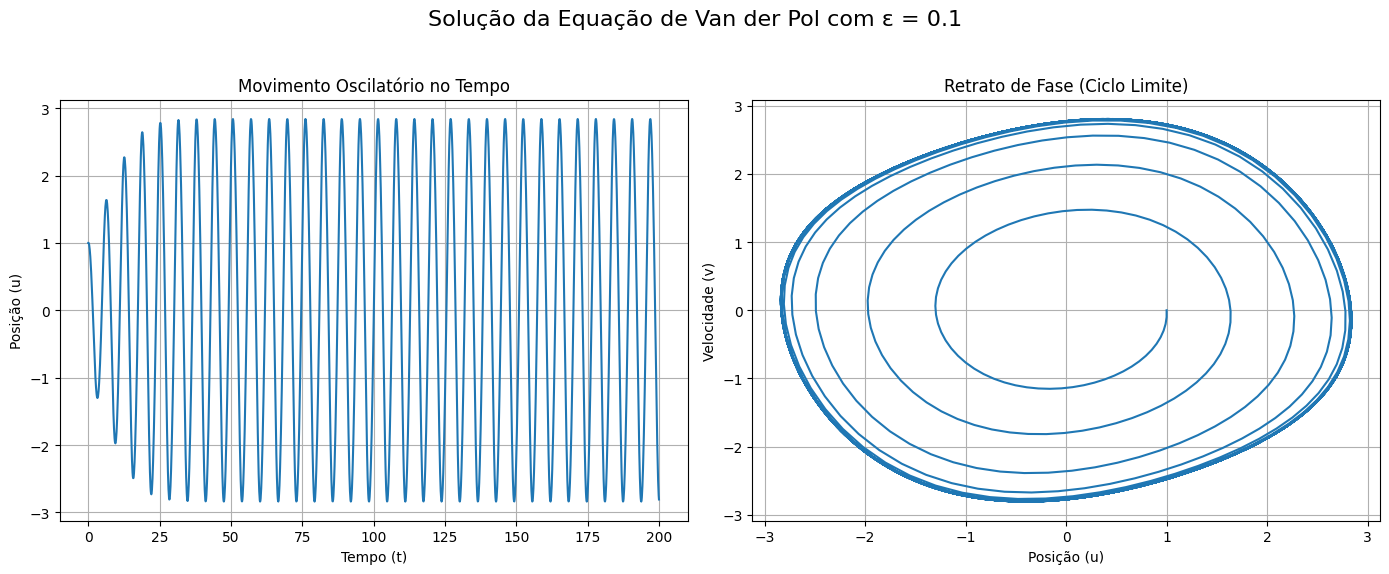

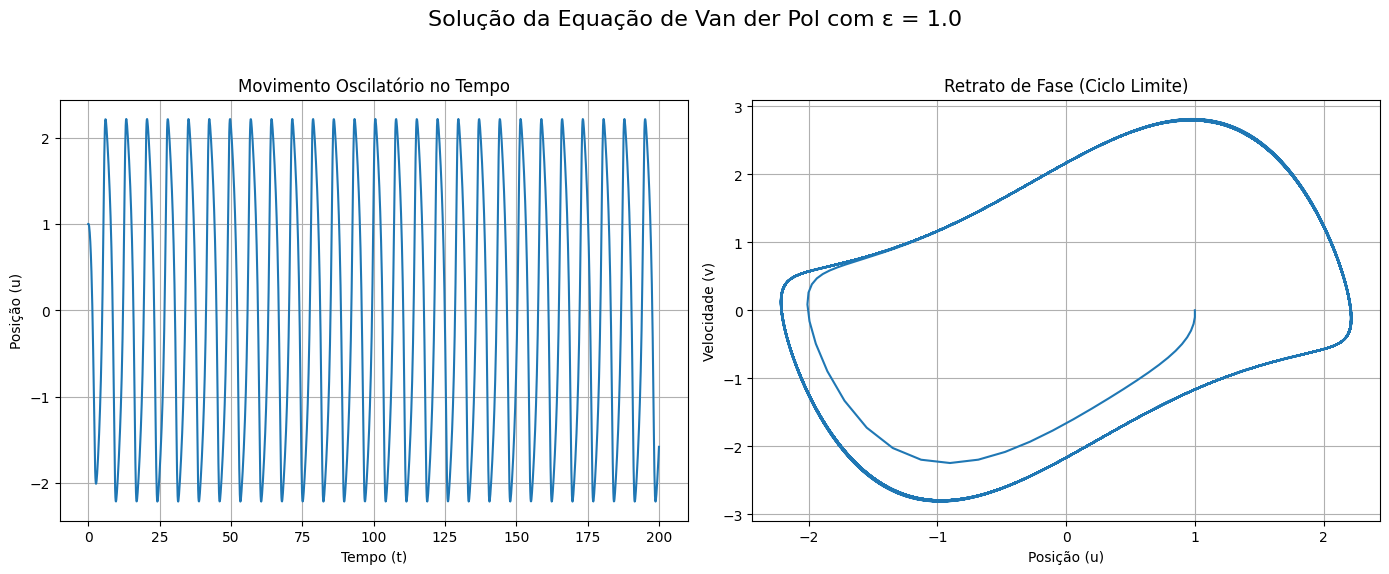

/tmp/ipython-input-3763636557.py:17: RuntimeWarning: overflow encountered in scalar multiply
  v[n+1] = v[n] + h * (-epsilon * (u[n]**2 - 1) * v[n] - u[n])
/tmp/ipython-input-3763636557.py:17: RuntimeWarning: overflow encountered in scalar power
  v[n+1] = v[n] + h * (-epsilon * (u[n]**2 - 1) * v[n] - u[n])
/tmp/ipython-input-3763636557.py:17: RuntimeWarning: invalid value encountered in scalar add
  v[n+1] = v[n] + h * (-epsilon * (u[n]**2 - 1) * v[n] - u[n])


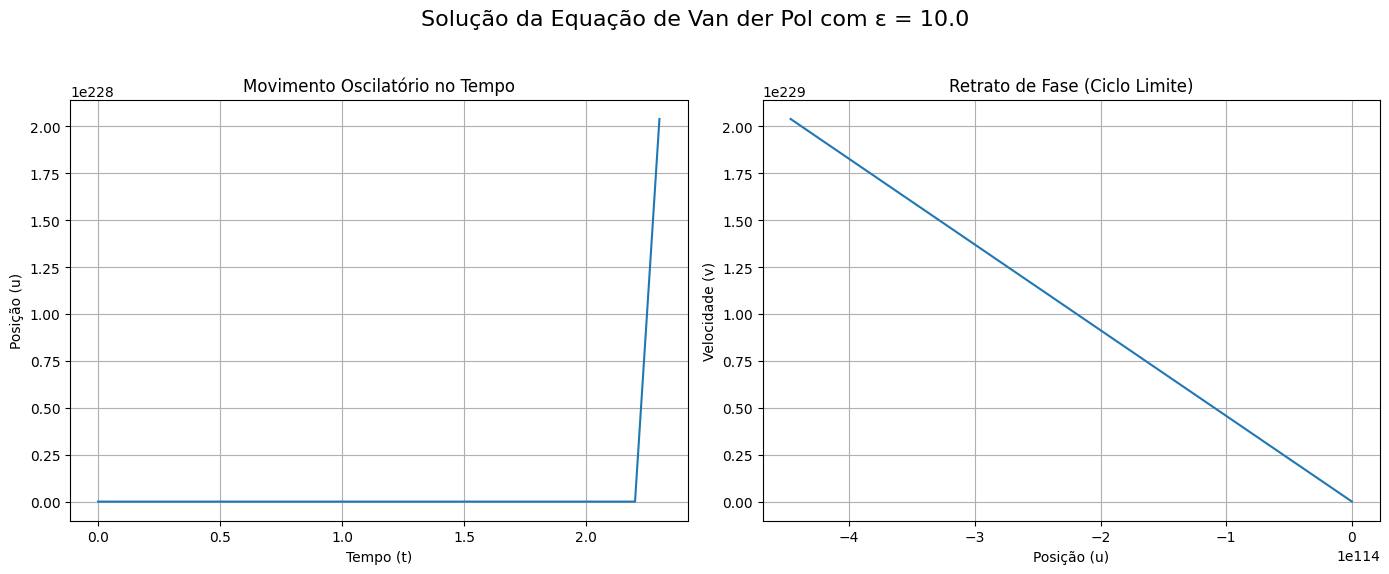

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def van_der_pol_solver(epsilon, u0, v0, h, num_steps):

    t = np.zeros(num_steps + 1)
    u = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)

    t[0] = 0
    u[0] = u0
    v[0] = v0

    for n in range(num_steps):

        u[n+1] = u[n] + h * v[n]
        v[n+1] = v[n] + h * (-epsilon * (u[n]**2 - 1) * v[n] - u[n])
        t[n+1] = t[n] + h

    return t, u, v

# Condições iniciais
u0 = 1.0
v0 = 0.0
h = 0.1
epsilons = [0.1, 1.0, 10.0]

num_steps = 2000

for epsilon_val in epsilons:
    # Resolve o sistema para o valor de epsilon atual
    t_sol, u_sol, v_sol = van_der_pol_solver(epsilon_val, u0, v0, h, num_steps)

    # Cria a figura para os gráficos
    plt.figure(figsize=(14, 6))
    plt.suptitle(f'Solução da Equação de Van der Pol com ε = {epsilon_val}', fontsize=16)

    # 1. Gráfico no plano (t-u) [cite: 256]
    plt.subplot(1, 2, 1)
    plt.plot(t_sol, u_sol)
    plt.title('Movimento Oscilatório no Tempo')
    plt.xlabel('Tempo (t)')
    plt.ylabel('Posição (u)')
    plt.grid(True)

    # 2. Gráfico no plano (u-v) - Retrato de Fase [cite: 258]
    plt.subplot(1, 2, 2)
    plt.plot(u_sol, v_sol)
    plt.title('Retrato de Fase (Ciclo Limite)')
    plt.xlabel('Posição (u)')
    plt.ylabel('Velocidade (v)')
    plt.grid(True)

    # Mostra os gráficos
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


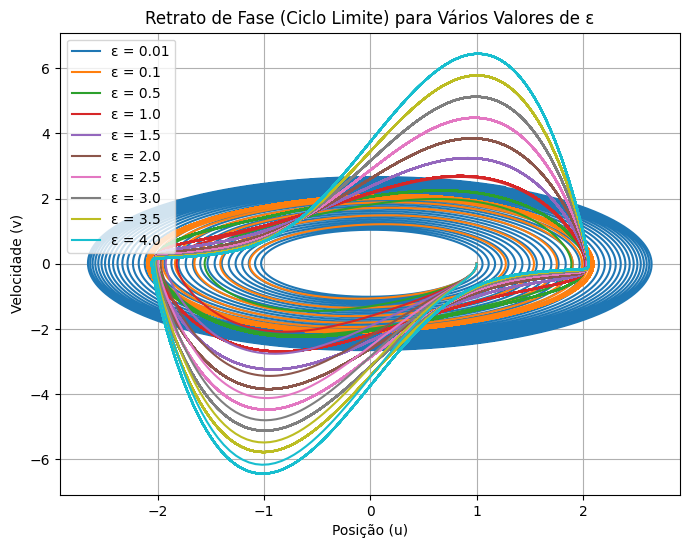

In [6]:
all_epsilons = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
num_steps = 20000
h = 0.01

plt.figure(figsize=(8, 6))
plt.title('Retrato de Fase (Ciclo Limite) para Vários Valores de ε')
plt.xlabel('Posição (u)')
plt.ylabel('Velocidade (v)')
plt.grid(True)

for epsilon_val in all_epsilons:
    t_sol, u_sol, v_sol = van_der_pol_solver(epsilon_val, u0, v0, h, num_steps)
    plt.plot(u_sol, v_sol, label=f'ε = {epsilon_val}')

plt.legend()
plt.show()